# Just operation policies of Guadalajara’s Aquapheric under drought conditions

## 2. Optimization Formulations

This notebook is designed to find the optimization formulations that can ensure that the optimal policies for the diversity of justice principle combinations can be found by filtering the pareto set. In other words, what a priori formulation can ensure an adecuate a posteriori implementation of the Distributive Justice 


In [1]:
from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, ema_logging,
                           Constant, Scenario, Constraint,optimize)

import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from AMG_function import AMG_model_function, AMG_model_function_int, AMG_model_function_old
from functions_data import full_dataframe
from AMG_drought_indicator import get_drought_state

#testing the model function
outcomes = AMG_model_function(chapala_flow= 7.1, calderon_lared_flow= 0, pozos_flow= 2.2, toluquilla_flow= 0.4, 
                aqp1_PP2_to_PP3=0.2, aqp2_PP3_to_Pozos=-0.71, aqp3_Pozos_to_Toluquilla=-0.6, aqp4_Toluquilla_to_PP1=-0.6,
                rounding_outcomes=2,
                rounding_levers=2)
print(outcomes)


{'delivered_PP1': 5.751, 'delivered_PP2': 1.349, 'delivered_PP3': 0, 'delivered_Pozos': 2.2, 'delivered_Toluquilla': 0.4, 'demand_PP1': 2.932923333333333, 'demand_PP2': 0.7571686458333333, 'demand_PP3': 0.9435108680555555, 'demand_Toluquilla': 0.782294375, 'demand_Pozos': 1.2014250347222222, 'supplied_PP1': 2.6693019600000003, 'supplied_PP2': 0.6854705, 'supplied_PP3': 0.8775000000000001, 'supplied_Toluquilla': 0.68757754, 'supplied_Pozos': 1.0439000000000003, 'total_supplied': 5.963750000000001, 'supplied_demand_PP1': 0.9101165140127543, 'supplied_demand_PP2': 0.9053075609669191, 'supplied_demand_PP3': 0.9300369817768028, 'supplied_demand_Toluquilla': 0.8789243051888237, 'supplied_demand_Pozos': 0.8688848407769005, 'supplied_demand_deficit_PP1': 0.08988348598724571, 'supplied_demand_deficit_PP2': 0.09469243903308089, 'supplied_demand_deficit_PP3': 0.06996301822319717, 'supplied_demand_deficit_Toluquilla': 0.1210756948111763, 'supplied_demand_deficit_Pozos': 0.13111515922309946, 'suppl

# 1. Testing global maxima prescence


This section is focused on finding what problem formulation (set of objectives) can ensure that the optimization algorithm can find the best policy for the different proposed objectives in a posteriori approach (filtering the parteto front).

## 1.1 Open Exploration of Ad-Hoc Formulations

In [16]:
#Problem formulation
performance_outcomes = {"supplied_demand_deficit":True,
                          "supplied_demand":False,
                          "supply_percapita":False}

justice_outcomes = {"supplied_demand_GINI":False,
                      "supply_percapita_GINI":False,
                      "supply_percapita_average":False,
                      "ZAs_below_142":False,
                      "ZAs_below_128":False,
                      "ZAs_below_100":False,
                      "ZAs_below_50":False}

other_outcomes = {"energy_costs":False}


#Model Parameters
n_nfe = 10000
epsilon = 0.4
seed = 1

#Scenario setting
drougth_multiplier = 0.5
scenario_drought_multiplier = {"name":f"drought_multiplier_{drougth_multiplier}",'chapala_flow' : 6.9*drougth_multiplier, 'calderon_lared_flow' : 1*drougth_multiplier, 'pozos_flow' : 2.3*drougth_multiplier, 'toluquilla_flow' : 0.5*drougth_multiplier}

representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)

scenario_name = "chapala_incident"
scenario = representative_scenarios_df.loc[scenario_name,:].to_dict()


all_outcomes = {**performance_outcomes, **justice_outcomes, **other_outcomes}
current_formulation = [outcome for outcome, active in all_outcomes.items() if active]

experiment_name = "-".join(current_formulation)+f" {scenario['name']}-{n_nfe}-{epsilon}-{seed}"
print(experiment_name)

supplied_demand_deficit Chapala accident-10000-0.4-1


In [18]:
from AMG_optimization import run_optimization, run_optimization_int, run_optimization_old
from AMG_function import AMG_model_function_old



# Model Parameters
n_nfe = 10000
epsilon = 0.04
seed = 1
flows = ["chapala_flow", "calderon_lared_flow", "pozos_flow", "toluquilla_flow"]


'''results  = run_optimization_old(experiment_name=experiment_name, 
                                justice_outcomes=justice_outcomes, performance_outcomes=performance_outcomes, other_outcomes=other_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario, model_function= AMG_model_function_old,
                 restriction = True)'''

results  = run_optimization(experiment_name=experiment_name, 
                 outcomes= all_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario, scenario_name=scenario_name,model_function= AMG_model_function,
                 restriction = True)

results.head()

Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
10546it [00:45, 232.08it/s]                                                    
[MainProcess/INFO] optimization completed, found 248 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]


,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,aqp4_Toluquilla_to_PP1,supplied_demand_deficit_PP1,supplied_demand_deficit_PP2,supplied_demand_deficit_PP3,supplied_demand_deficit_Toluquilla,supplied_demand_deficit_Pozos,experiment_name,seed,duration,scenario
0,0.379190,-0.643690,-0.567362,-0.684206,0.108545,0.248520,0.007802,0.023991,0.112898,supplied_demand_deficit Chapala accident-10000...,1,47.0,chapala_incident
1,0.141207,-0.875357,-0.645057,-0.723432,0.117239,0.044221,0.003451,0.055955,0.196200,supplied_demand_deficit Chapala accident-10000...,1,47.0,chapala_incident
2,0.563807,-0.446858,-0.429218,-0.552572,0.079372,0.407007,0.000613,0.018583,0.081146,supplied_demand_deficit Chapala accident-10000...,1,47.0,chapala_incident
3,0.096501,-0.184126,-0.429218,-0.552572,0.079372,0.005843,0.503548,0.018583,0.060998,supplied_demand_deficit Chapala accident-10000...,1,47.0,chapala_incident
4,0.074109,-0.855217,-0.162365,-0.263784,0.015371,0.013380,0.056649,0.036808,0.446452,supplied_demand_deficit Chapala accident-10000...,1,47.0,chapala_incident


## 3. Run Optimizations with Different Formulations

In [2]:
formulations = pd.read_excel("2_formulation\optimization_parameters.xlsx", index_col="experiment_name")
formulations.head(50)

,supplied_demand_deficit,supplied_demand,supply_percapita,supplied_demand_GINI,supply_percapita_GINI,average_supply_percapita,ZAs_below_142,ZAs_below_128,ZAs_below_100,ZAs_below_50,...,epsilon,seed,scenario_name,scenario_chapala_flow,scenario_calderon_lared_flow,scenario_pozos_flow,scenario_toluquilla_flow,restriction,model_function,Rationale
experiment_name,,,,,,,,,,,,,,,,,,,,,
Supplied Demand Deficit,True,False,False,False,False,False,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",True,False,False,False,True,False,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
Sup. Dem. Deficit & All Justice,True,False,False,True,True,True,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN


In [10]:
representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)
representative_scenarios_df.head()

,Chapala,Calderon la Red,Pozos well system,Toluquilla well system,name
2021_drought,7.1,0,2.20,0.40,2021 drought
chapala_incident,1.8,1,2.20,0.40,Chapala accident
groundwater_scarcity,6.9,1,0.69,0.15,Groundwater scarcity


In [11]:
from AMG_optimization import run_optimization

outcomes_vars =["supplied_demand_deficit","supplied_demand","supply_percapita",
        "supplied_demand_GINI","supply_percapita_GINI","average_supply_percapita",
        "ZAs_below_142","ZAs_below_128","ZAs_below_100","ZAs_below_50",
        "energy_costs"]

aqp_flows = ["aqp1_PP2_to_PP3", "aqp2_PP3_to_Pozos", "aqp3_Pozos_to_Toluquilla", "aqp4_Toluquilla_to_PP1"]

# Model Parameters
n_nfe = 20000
epsilon = 0.04
seed = 1

# Define scenario from the representative scenarios df
representative_scenarios = ["2021_drought"]
representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)

for scenario_name in representative_scenarios:

    scenario = representative_scenarios_df.loc[scenario_name,:].to_dict()

    # Empty df to concat all results from the optimizations 
    full_optimization_results = pd.DataFrame()

    for experiment_name, formulation in formulations.iterrows():
        results = run_optimization(experiment_name=experiment_name, 
                                            outcomes = formulation[outcomes_vars].to_dict(),
                                            scenario=scenario,
                                            scenario_name = scenario_name,
                                            rounding_levers=3,
                                            n_nfe = n_nfe,
                                            epsilon = epsilon,
                                            seed=seed)

        

        # Remove outcomes
        results = results.loc[:,aqp_flows+["experiment_name", "scenario", "seed", "duration"]]
        full_results_df = full_dataframe(results,scenarios_in_dataframe=False, scenario = scenario)

        # Adding some information columns not usually included in the full_dataframe function
        full_results_df = pd.concat([full_results_df, results[["scenario", "seed", "duration"]]], axis = 1)
        
        full_optimization_results = pd.concat([full_results_df,full_optimization_results])



    # Change index from individual optimization runs and use it to define policies
    full_optimization_results = full_optimization_results.reset_index()
    full_optimization_results = full_optimization_results.rename(columns={"index":"policy"})


    full_optimization_results.to_csv(f"results/optimization_results_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv",index=False)

full_optimization_results.head()


Scenario({'Chapala': 7.1, 'Calderon la Red': 0, 'Pozos well system': 2.2, 'Toluquilla well system': 0.4})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
  0%|                                                | 0/20000 [00:00<?, ?it/s]

In [12]:
import pandas as pd
from AMG_optimization import run_optimization
from functions_data import full_dataframe  # Assuming this is where full_dataframe comes from

# Define the outcome variables and AQP flows
outcomes_vars = [
    "supplied_demand_deficit", "supplied_demand", "supply_percapita",
    "supplied_demand_GINI", "supply_percapita_GINI", "average_supply_percapita",
    "ZAs_below_142", "ZAs_below_128", "ZAs_below_100", "ZAs_below_50",
    "energy_costs"
]

aqp_flows = [
    "aqp1_PP2_to_PP3", "aqp2_PP3_to_Pozos", "aqp3_Pozos_to_Toluquilla", "aqp4_Toluquilla_to_PP1"
]

# Model Parameters
n_nfe = 1000
epsilon = 0.04
seed = 1

# Define scenario from the representative scenarios df
representative_scenarios = ["2021_drought", "chapala_incident", "groundwater_scarcity"]
representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)

# Empty DataFrames to concatenate all results from the optimizations 
full_optimization_results = pd.DataFrame()
final_optimization_results = pd.DataFrame()

# Iterate over each scenario
for scenario_name in representative_scenarios:
    scenario = representative_scenarios_df.loc[scenario_name, :].to_dict()

    for experiment_name, formulation in formulations.iterrows():
        results = run_optimization(
            experiment_name=experiment_name,
            outcomes=formulation[outcomes_vars].to_dict(),
            scenario=scenario,
            scenario_name=scenario_name,
            rounding_levers=3,
            n_nfe=n_nfe,
            epsilon=epsilon,
            seed=seed
        )

        # Filter relevant columns
        results = results.loc[:, aqp_flows + ["experiment_name", "scenario", "seed", "duration"]]
        
        # Create the full results DataFrame
        full_results_df = full_dataframe(results, scenarios_in_dataframe=False, scenario=scenario)

        # Adding additional information columns
        full_results_df = pd.concat([full_results_df, results[["scenario", "seed", "duration"]]], axis=1)
        
        # Concatenate results
        full_optimization_results = pd.concat([full_optimization_results, full_results_df])

    # Reset index and rename the index column to 'policy' if it does not exist
    if 'policy' not in full_optimization_results.columns:
        full_optimization_results = full_optimization_results.reset_index(drop=True).rename_axis('policy').reset_index()

    # Concatenate to final results DataFrame
    final_optimization_results = pd.concat([final_optimization_results, full_optimization_results])

# Reset index of final results DataFrame
final_optimization_results = final_optimization_results.reset_index(drop=True)

# Save results to CSV
final_optimization_results.to_csv(f"results/optimization_results_sd{seed}_ep{epsilon}_nfe{n_nfe}.csv", index=False)

# Display the first few rows of the final results
print(final_optimization_results.head())

Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
1075it [00:07, 149.94it/s]                                                     
[MainProcess/INFO] optimization completed, found 83 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]
Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supply_percapita_GINI', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
1079it [00:08, 130.40it/s]                                                     
[MainProcess/INFO] optimization completed, found 90 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supply_percapita_GINI'), ScalarOutcome('energy_costs'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]
Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'average_supply_percapita', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
1076it [00:10, 101.88it/s]                                                     
[MainProcess/INFO] optimization completed, found 102 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supplied_demand_GINI'), ScalarOutcome('supply_percapita_GINI'), ScalarOutcome('energy_costs'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]
Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
1079it [00:10, 99.45it/s]                                                      
[MainProcess/INFO] optimization completed, found 186 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]
Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supply_percapita_GINI', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
1082it [00:10, 100.51it/s]                                                     
[MainProcess/INFO] optimization completed, found 176 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supply_percapita_GINI'), ScalarOutcome('energy_costs'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]
Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'average_supply_percapita', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
1077it [00:11, 96.95it/s]                                                      
[MainProcess/INFO] optimization completed, found 182 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supplied_demand_GINI'), ScalarOutcome('supply_percapita_GINI'), ScalarOutcome('energy_costs'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]
Scenario({'chapala_flow': 6.9, 'calderon_lared_flow': 1, 'pozos_flow': 0.69, 'toluquilla_flow': 0.15})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
1080it [00:10, 102.75it/s]                                                     
[MainProcess/INFO] optimization completed, found 166 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]
Scenario({'chapala_flow': 6.9, 'calderon_lared_flow': 1, 'pozos_flow': 0.69, 'toluquilla_flow': 0.15})
['supplied_demand_deficit', 'supply_percapita_GINI', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
1069it [00:08, 120.44it/s]                                                     
[MainProcess/INFO] optimization completed, found 208 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supply_percapita_GINI'), ScalarOutcome('energy_costs'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]
Scenario({'chapala_flow': 6.9, 'calderon_lared_flow': 1, 'pozos_flow': 0.69, 'toluquilla_flow': 0.15})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'average_supply_percapita', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
1082it [00:09, 119.29it/s]                                                     
[MainProcess/INFO] optimization completed, found 190 solutions
[MainProcess/INFO] terminating pool


[ScalarOutcome('supplied_demand_deficit_PP1'), ScalarOutcome('supplied_demand_deficit_PP2'), ScalarOutcome('supplied_demand_deficit_PP3'), ScalarOutcome('supplied_demand_deficit_Toluquilla'), ScalarOutcome('supplied_demand_deficit_Pozos'), ScalarOutcome('supplied_demand_GINI'), ScalarOutcome('supply_percapita_GINI'), ScalarOutcome('energy_costs'), ScalarOutcome('supplied_PP1'), ScalarOutcome('supplied_PP2'), ScalarOutcome('supplied_PP3'), ScalarOutcome('supplied_Toluquilla'), ScalarOutcome('supplied_Pozos')]
   policy  aqp4_Toluquilla_to_PP1  aqp1_PP2_to_PP3  aqp2_PP3_to_Pozos  \
0     0.0               -0.684206         0.379190          -0.643690   
1     1.0               -0.723432         0.141207          -0.875357   
2     2.0               -0.155786         0.078227           0.422384   
3     3.0               -0.631312         0.778428          -0.217896   
4     4.0               -0.552572         0.563807          -0.446858   

   aqp3_Pozos_to_Toluquilla  delivered_PP1  del

In [8]:
from functions_data import find_minmax_values
representative_scenarios = ["2021_drought", "chapala_incident", "groundwater_scarcity"]
for scenario_name in representative_scenarios:
    full_optimization_results = pd.read_csv(f"results/optimization_results_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv")

    # Finds the maximum or minimum value for each objective for each formulation
    min_max_df = find_minmax_values(full_optimization_results)
    min_max_df.to_csv(f"results/min_max_{scenario_name}_{seed}.csv" )

min_max_df.head()



FileNotFoundError: [Errno 2] No such file or directory: 'results/optimization_results_2021_drought_sd1ep0.04nfe20000.csv'

supplied_demand_deficit_PP1           0.000013
supplied_demand_deficit_PP2           0.000010
supplied_demand_deficit_PP3           0.000005
supplied_demand_deficit_Toluquilla    0.000011
supplied_demand_deficit_Pozos         0.000047
supplied_demand_GINI                  0.016874
supply_percapita_GINI                 0.003386
ZAs_below_142                         1.000000
ZAs_below_100                         0.000000
ZAs_below_50                          0.000000
energy_costs                          0.023839
supplied_demand_PP1                   1.125435
supplied_demand_PP2                   1.137893
supplied_demand_PP3                   1.082607
supplied_demand_Toluquilla            1.341683
supplied_demand_Pozos                 1.189126
comp_energy_costs                     0.179860
comp_supplied_demand_GINI             0.063006
Name: Sup. Dem. Deficit & All Justice, dtype: float64
supplied_demand_deficit_PP1           0.000010
supplied_demand_deficit_PP2           0.000044
suppli

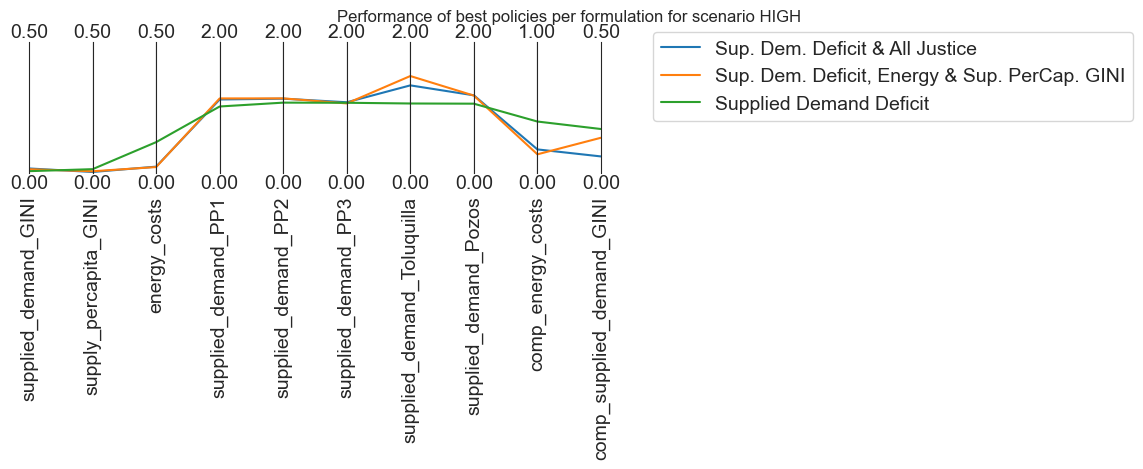

In [23]:
from ema_workbench.analysis import parcoords

# Load your data and limits (replace with your actual data and limits)

seed = 1
representative_scenarios = ["2021_drought", "chapala_incident", "groundwater_scarcity"]
scenario_name = representative_scenarios[0]
data = pd.read_csv(f"results/min_max_{scenario_name}_{seed}.csv", index_col="formulation")

limits = pd.read_csv("2_formulation/limits.csv")

# Replace underscores with spaces in column names
#limits.columns = limits.columns.str.replace('_', ' ')

# Create parallel axes plot
paraxes = parcoords.ParallelAxes(limits)
colors = sns.color_palette()
# Plot each row of data
for i, (index, row) in enumerate(data.iterrows()):
    print(row)
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])

# Customize the plot
plt.title(f'Performance of best policies per formulation for scenario {scenario_name}')
paraxes.legend()

# Adjust tick labels
for ax in paraxes.axes:
    # Remove the unnecessary decimal places
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    
    # Add percentage symbol to tick labels (excluding GINI columns)
    if 'GINI' not in ax.get_ylabel():
        ax.set_yticklabels([f'{int(tick * 100)}%' for tick in ax.get_yticks()])

# Save the figure
plt.savefig("2_formulation/min_max_comp_HIGH.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
full_optimization_results

,policy,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,...,supplied_demand_GINI,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,ZAs_below_128,experiment_name,scenario,seed,duration
0,0,-615,-297,-138,-185,1.863,0.437,0.333,0.767,0.167,...,0.262,0.309,5.0,5.0,2.0,5.0,Sup. Dem. Deficit & All Justice,rep_scen_HIGH,1,72.0
1,1,-989,311,-403,-477,1.863,0.437,0.333,0.767,0.167,...,0.393,0.545,5.0,3.0,2.0,5.0,Sup. Dem. Deficit & All Justice,rep_scen_HIGH,1,72.0
2,2,-918,224,-223,-961,1.863,0.437,0.333,0.767,0.167,...,0.343,0.582,5.0,4.0,3.0,5.0,Sup. Dem. Deficit & All Justice,rep_scen_HIGH,1,72.0
3,3,-552,85,216,-477,1.863,0.437,0.333,0.767,0.167,...,0.248,0.332,5.0,4.0,3.0,5.0,Sup. Dem. Deficit & All Justice,rep_scen_HIGH,1,72.0
4,4,-613,-844,-498,-2,1.863,0.437,0.333,0.767,0.167,...,0.497,0.489,4.0,3.0,3.0,4.0,Sup. Dem. Deficit & All Justice,rep_scen_HIGH,1,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,90,-953,-183,-758,-984,1.863,0.437,0.333,0.767,0.167,...,0.268,0.720,5.0,4.0,2.0,5.0,Supplied Demand Deficit,rep_scen_HIGH,1,58.0
512,91,-988,267,-523,-376,1.863,0.437,0.333,0.767,0.167,...,0.404,0.538,5.0,3.0,3.0,4.0,Supplied Demand Deficit,rep_scen_HIGH,1,58.0
513,92,-994,76,-450,-988,1.863,0.437,0.333,0.767,0.167,...,0.289,0.627,5.0,4.0,3.0,5.0,Supplied Demand Deficit,rep_scen_HIGH,1,58.0
514,93,-587,69,-360,-877,1.863,0.437,0.333,0.767,0.167,...,0.330,0.473,5.0,5.0,3.0,5.0,Supplied Demand Deficit,rep_scen_HIGH,1,58.0


In [ ]:
from functions_data import find_compromise, find_best_policies

def find_best_policies(df, objectives_min, objectives_max, compromise_objectives):
    df_copy = df.copy()  # To avoid modifying the original DataFrame
    
    # Group the DataFrame by 'experiment_name'
    grouped = df_copy.groupby('experiment_name')
    
    # Add columns to the DataFrame for min and max objectives only
    for obj in objectives_min:
        df_copy[f'{obj}_min'] = False
    for obj in objectives_max:
        df_copy[f'{obj}_max'] = False
    # Add columns for compromise objectives
    for obj in compromise_objectives:
        df_copy[f'{obj}_compromise'] = False
    
    # Iterate over each group
    for name, group in grouped:
        # Find the indices of the min and max for each objective within the group
        for obj in objectives_min:
            min_value = group[obj].min()
            min_indices = group[group[obj] == min_value].index
            df_copy.loc[min_indices, f'{obj}_min'] = True
        for obj in objectives_max:
            max_value = group[obj].max()
            max_indices = group[group[obj] == max_value].index
            df_copy.loc[max_indices, f'{obj}_max'] = True
        
        # Find the compromise solution within the group
        compromise_index = find_compromise(group[compromise_objectives], deficitIndex=0)
        for obj in compromise_objectives:
            df_copy.loc[group.index[compromise_index], f'{obj}_compromise'] = True
    
    return df_copy

objectives_min = ['supplied_demand_deficit_PP1',
       'supplied_demand_deficit_PP2', 'supplied_demand_deficit_PP3',
       'supplied_demand_deficit_Toluquilla', 'supplied_demand_deficit_Pozos',
       "supplied_demand_GINI","supply_percapita_GINI",
       'ZAs_below_142','ZAs_below_100', 'ZAs_below_50',
       "energy_costs"]

objectives_max = ['supplied_demand_PP1', 'supplied_demand_PP2', 'supplied_demand_PP3',
       'supplied_demand_Toluquilla', 'supplied_demand_Pozos']

compromise_objectives = ["energy_costs","supplied_demand_GINI"]

full_optimization_results_over_50 = full_optimization_results

best_policies_df = find_best_policies(full_optimization_results_over_50, objectives_min, objectives_max, compromise_objectives)

best_policies_df.to_csv("results/filtering_test.csv",index=False)
best_policies_df.tail()

,policy,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,...,ZAs_below_100_min,ZAs_below_50_min,energy_costs_min,supplied_demand_PP1_max,supplied_demand_PP2_max,supplied_demand_PP3_max,supplied_demand_Toluquilla_max,supplied_demand_Pozos_max,energy_costs_compromise,supplied_demand_GINI_compromise
511,90,-953,-183,-758,-984,1.863,0.437,0.333,0.767,0.167,...,False,False,False,False,False,False,False,False,False,False
512,91,-988,267,-523,-376,1.863,0.437,0.333,0.767,0.167,...,True,False,False,False,False,False,False,False,False,False
513,92,-994,76,-450,-988,1.863,0.437,0.333,0.767,0.167,...,False,False,False,False,False,False,False,False,False,False
514,93,-587,69,-360,-877,1.863,0.437,0.333,0.767,0.167,...,False,False,False,False,False,False,False,False,False,False
515,94,-992,-335,-181,-528,1.863,0.437,0.333,0.767,0.167,...,False,False,False,False,False,False,False,False,False,False


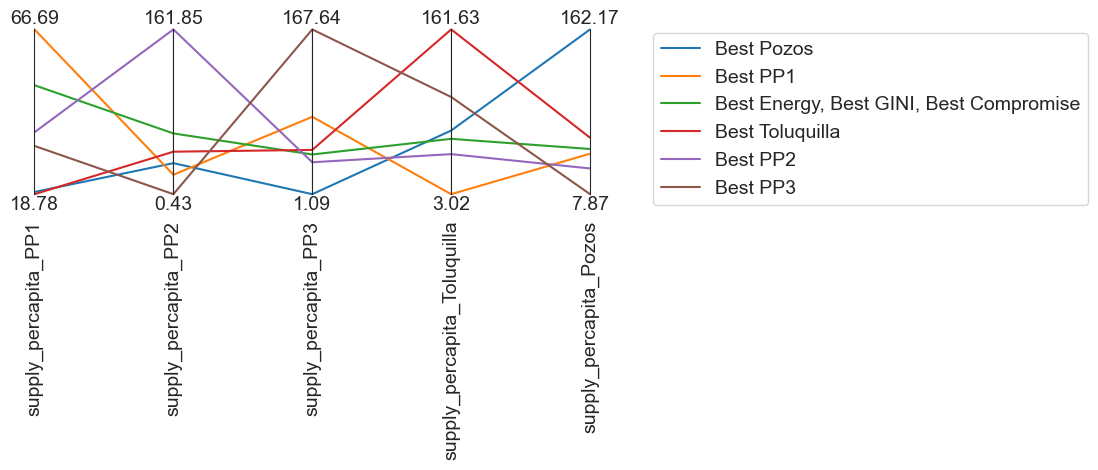

In [ ]:
import pandas as pd
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

# Load the data from the provided CSV file (if not already loaded)
best_policies_df = pd.read_csv('results/filtering_test.csv')
ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

# Filter the DataFrame for the "Supplied Demand & All Justice Objectives" experiment
experiment_name = "Sup. Dem. Deficit & All Justice"
filtered_df = best_policies_df[best_policies_df['experiment_name'] == experiment_name]

# Identify the columns that indicate best performance (ending in '_min', '_max', or '_compromise')
best_performance_columns = ["energy_costs_min", "supply_percapita_GINI_min", "energy_costs_compromise"] + [f"supplied_demand_{ZA}_max" for ZA in ZA_names]

# Create a dictionary for labeling the policies
policy_labels = {
    "energy_costs_min": "Best Energy",
    "supply_percapita_GINI_min": "Best GINI",
    "energy_costs_compromise": "Best Compromise",
    **{f"supplied_demand_{ZA}_max": f"Best {ZA}" for ZA in ZA_names}
}

# Filter rows where at least one of the best performance columns is True
best_performing_policies_df = filtered_df[filtered_df[best_performance_columns].any(axis=1)]

# Create a dictionary to map index to labels
index_labels = {}
for col, label in policy_labels.items():
    indices = best_performing_policies_df[best_performing_policies_df[col] == True].index
    for idx in indices:
        if idx in index_labels:
            index_labels[idx] += f", {label}"
        else:
            index_labels[idx] = label

# Select the supply per capita columns for the five zones of analysis (ZA)
supply_per_capita_columns = [
    'supply_percapita_PP1', 'supply_percapita_PP2', 'supply_percapita_PP3',
    'supply_percapita_Toluquilla', 'supply_percapita_Pozos'
]
data = best_performing_policies_df[supply_per_capita_columns]

# Get limits for parallel coordinates plot
limits = parcoords.get_limits(data)

# Create the parallel axes plot
paraxes = parcoords.ParallelAxes(limits)

# Plot each row
colors = plt.cm.tab10.colors
for i, (index, row) in enumerate(data.iterrows()):
    label = index_labels.get(index, str(index))
    paraxes.plot(row.to_frame().T, label=label, color=colors[i % len(colors)])

# Add legend and show plot
paraxes.legend()
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

# Select columns for the DataFrame
full_optimization_results_df = pd.read_csv("results/filtering_test.csv")
dataframe = full_optimization_results_df[[f"supplied_demand_{ZA}" for ZA in ZA_names] + ["supplied_demand_GINI", "experiment_name"]]

# Create a DataFrame with the necessary columns
viz_data = dataframe.rename(columns=lambda x: x.split('_')[-1])

# Melt the DataFrame to long format for plotting
viz_data_melted = viz_data.melt(id_vars=['experiment_name'], var_name='Outcome')

# Create the clustered box plot with customized parameters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='value', hue='experiment_name', data=viz_data_melted, palette='Set2')
plt.title('Clustered Box Plot of Outcomes for {}'.format("title"))
plt.tight_layout()

# Show the plot
plt.savefig("experiment_results/experiments_boxplot.png")
plt.show()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['experiment_name']"

In [ ]:
from functions_viz import violin_plot

results_plot = full_df[[f"supplied_demand_{ZA}" for ZA in ZA_names]+["supplied_demand_GINI"]]
violin_plot(results_plot,experiment_name, y_axis="Supplied demand")

ModuleNotFoundError: No module named 'viz_functions'

from viz_functions import parallel_axis_plot

parallel_axis_plot(results_plot)

In [ ]:
experiment_results = full_df


experiment_results.head()

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Toluquilla,delivered_Pozos,supplied_PP1,...,supply_percapita_average,min_supplied_demand,supply_percapita_GINI,supplied_demand_GINI,average_supply_percapita,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,experiment
0,-0.431440,0.163298,-0.597881,-0.078320,5.751,1.349,0.0,0.4,2.2,2.778866,...,137.4,0.648,0.104221,0.103266,138.0,0.317735,3.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
1,-0.381440,0.811276,-0.308070,-0.371393,5.751,1.349,0.0,0.4,2.2,2.811366,...,130.0,0.381,0.152000,0.137022,138.0,0.468045,3.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
2,-0.617442,0.475436,-0.428132,-0.362303,5.751,1.349,0.0,0.4,2.2,2.657965,...,136.0,0.669,0.082353,0.078145,138.0,0.470828,2.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
3,-0.350342,0.471640,-0.460169,-0.143333,5.751,1.349,0.0,0.4,2.2,2.831580,...,133.6,0.672,0.093413,0.088018,138.0,0.356371,2.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
4,-0.328725,0.488656,-0.565736,-0.067127,5.751,1.349,0.0,0.4,2.2,2.845631,...,134.2,0.658,0.116841,0.113120,138.0,0.362561,2.0,2.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...


In [ ]:
experiment_results = full_df.drop(full_df.index, inplace=False)
experiment_results.head()

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Toluquilla,delivered_Pozos,supplied_PP1,...,supply_percapita_average,min_supplied_demand,supply_percapita_GINI,supplied_demand_GINI,average_supply_percapita,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,experiment


In [ ]:
experiments=["gini and supplied demand deficit minimization - 5k nfe.csv",
             "gini minimization and supply per capita maximization - 5k nfe.csv",
             "gini minimization and supplied demand maximization - 5k nfe.csv",
             "only GINI supplied demand optimization.csv"]

experiment_results = full_df.drop(full_df.index, inplace=False)

for experiment in experiments:
    df=pd.read_csv(f"experiment_results/{experiment}")
    print(df.columns[-6:])
    experiment_results=pd.concat([experiment_results,df])#

experiment_results.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_results/gini and supplied demand deficit minimization - 5k nfe.csv'

In [ ]:
dataframe= experiment_results[[f"supplied_demand_{ZA}" for ZA in ZA_names]+["supplied_demand_GINI"]+["experiment"]]
dataframe.tail()

,supplied_demand_PP1,supplied_demand_PP2,supplied_demand_PP3,supplied_demand_Toluquilla,supplied_demand_Pozos,supplied_demand_GINI,experiment
1886,0.82384,0.92362,0.89705,2.45025,0.07073,0.376252,gini minimization and supplied demand maximiza...
1887,1.14300,0.56884,1.24756,1.22292,0.03908,0.290997,gini minimization and supplied demand maximiza...
1888,0.93574,0.38714,0.27807,1.91102,0.97287,0.343524,gini minimization and supplied demand maximiza...
1889,0.95059,1.09702,0.85189,0.72282,0.81227,0.079982,gini minimization and supplied demand maximiza...
0,0.89469,0.90960,0.90902,0.90732,0.90185,0.003272,only GINI supplied demand optimization


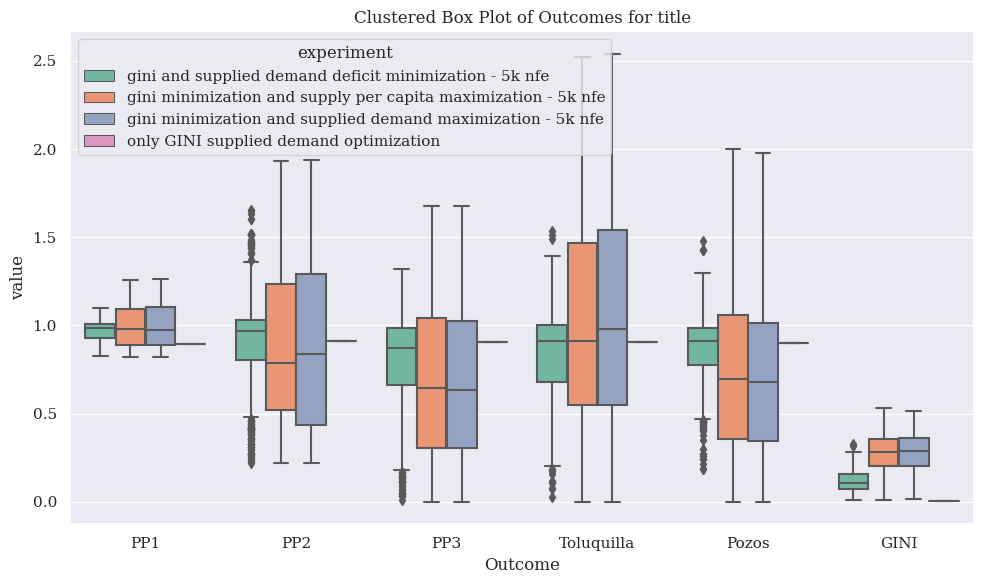

In [ ]:
from viz_functions import clustered_box_plot

clustered_box_plot(experiment_results)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x600 with 0 Axes>

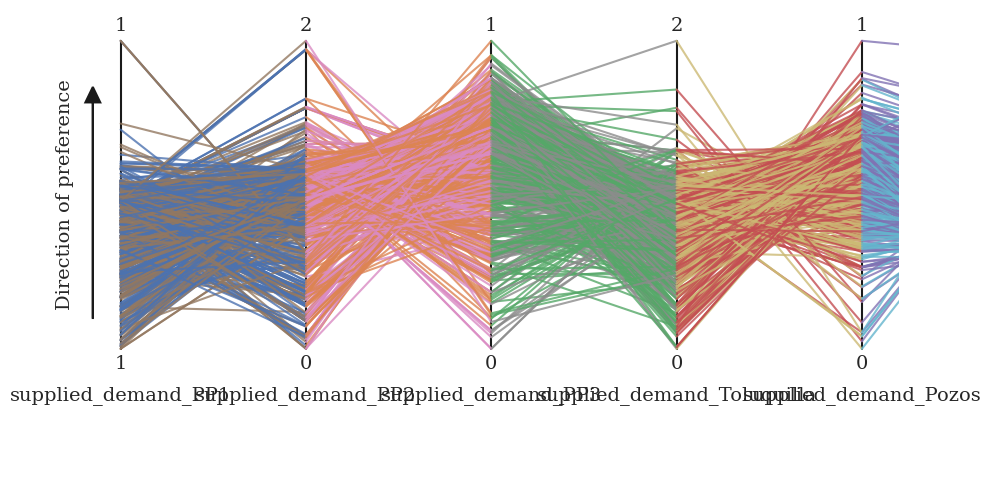

In [ ]:
### function to normalize data based on direction of preference and whether each objective is minimized or maximized
###   -> output dataframe will have values ranging from 0 (which maps to bottom of figure) to 1 (which maps to top)
def reorganize_objs(objs, columns_axes, ideal_direction, minmaxs):
    ### if min/max directions not given for each axis, assume all should be maximized
    if minmaxs is None:
        minmaxs = ['max']*len(columns_axes)
         
    ### get subset of dataframe columns that will be shown as parallel axes
    objs_reorg = objs[columns_axes]
     
    ### reorganize & normalize data to go from 0 (bottom of figure) to 1 (top of figure), 
    ### based on direction of preference for figure and individual axes
    if ideal_direction == 'bottom':
        tops = objs_reorg.min(axis=0)
        bottoms = objs_reorg.max(axis=0)
        for i, minmax in enumerate(minmaxs):
            if minmax == 'max':
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i]) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
            else:
                bottoms[i], tops[i] = tops[i], bottoms[i]
                objs_reorg.iloc[:, -1] = (objs_reorg.iloc[:, -1] - objs_reorg.iloc[:, -1].min(axis=0)) / \
                                         (objs_reorg.iloc[:, -1].max(axis=0) - objs_reorg.iloc[:, -1].min(axis=0))
    elif ideal_direction == 'top':
        tops = objs_reorg.max(axis=0)
        bottoms = objs_reorg.min(axis=0)
        for i, minmax in enumerate(minmaxs):
            if minmax == 'max':
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i] - objs_reorg.iloc[:, i].min(axis=0)) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
            else:
                bottoms[i], tops[i] = tops[i], bottoms[i]
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i]) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
 
    return objs_reorg, tops, bottoms

### function to get color based on continuous color map or categorical map
def get_color(value, color_by_continuous, color_palette_continuous, 
              color_by_categorical, color_dict_categorical):
    if color_by_continuous is not None:
        color = colormaps.get_cmap(color_palette_continuous)(value)
    elif color_by_categorical is not None:
        color = color_dict_categorical[value]
    return color

### function to get zorder value for ordering lines on plot. 
### This works by binning a given axis' values and mapping to discrete classes.
def get_zorder(norm_value, zorder_num_classes, zorder_direction):
    xgrid = np.arange(0, 1.001, 1/zorder_num_classes)
    if zorder_direction == 'ascending':
        return 4 + np.sum(norm_value > xgrid)
    elif zorder_direction == 'descending':
        return 4 + np.sum(norm_value < xgrid)

def custom_parallel_coordinates(objs, columns_axes=None, axis_labels=None, 
                                ideal_direction='top', minmaxs=None, 
                                color_by_continuous=None, color_palette_continuous=None, 
                                color_by_categorical=None, color_palette_categorical=None,
                                colorbar_ticks_continuous=None, color_dict_categorical=None,
                                zorder_by=None, zorder_num_classes=10, zorder_direction='ascending', 
                                alpha_base=0.8, brushing_dict=None, alpha_brush=0.05, 
                                lw_base=1.5, fontsize=14, 
                                figsize=(11,6), save_fig_filename=None):
     
    ### verify that all inputs take supported values
    assert ideal_direction in ['top','bottom']
    assert zorder_direction in ['ascending', 'descending']
    if minmaxs is not None:
        for minmax in minmaxs:
            assert minmax in ['max','min']
    assert color_by_continuous is None or color_by_categorical is None
    if columns_axes is None:
        columns_axes = objs.columns
    if axis_labels is None:
        axis_labels = columns_axes
     
    ### create figure
    fig,ax = plt.subplots(1,1,figsize=figsize, gridspec_kw={'hspace':0.1, 'wspace':0.1})
 
    ### reorganize & normalize objective data
    objs_reorg, tops, bottoms = reorganize_objs(objs, columns_axes, ideal_direction, minmaxs)
 
    ### apply any brushing criteria
    if brushing_dict is not None:
        satisfice = np.zeros(objs.shape[0]) == 0.
        ### iteratively apply all brushing criteria to get satisficing set of solutions
        for col_idx, (threshold, operator) in brushing_dict.items():
            if operator == '<':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] < threshold)
            elif operator == '<=':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] <= threshold)
            elif operator == '>':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] > threshold)
            elif operator == '>=':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] >= threshold)
 
            ### add rectangle patch to plot to represent brushing
            threshold_norm = (threshold - bottoms[col_idx]) / (tops[col_idx] - bottoms[col_idx])
            if ideal_direction == 'top' and minmaxs[col_idx] == 'max':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
            elif ideal_direction == 'top' and minmaxs[col_idx] == 'min':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
            if ideal_direction == 'bottom' and minmaxs[col_idx] == 'max':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
            elif ideal_direction == 'bottom' and minmaxs[col_idx] == 'min':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                     
            pc = PatchCollection([rect], facecolor='grey', alpha=0.5, zorder=3)
            ax.add_collection(pc)
     
    ### loop over all solutions/rows & plot on parallel axis plot
    for i in range(objs_reorg.shape[0]):
        if color_by_continuous is not None:
            color = get_color(objs_reorg[columns_axes[color_by_continuous]].iloc[i], 
                              color_by_continuous, color_palette_continuous, 
                              color_by_categorical, color_dict_categorical)
        elif color_by_categorical is not None:
            color = get_color(objs[color_by_categorical].iloc[i], 
                              color_by_continuous, color_palette_continuous, 
                              color_by_categorical, color_dict_categorical)
                         
        ### order lines according to ascending or descending values of one of the objectives?
        if zorder_by is None:
            zorder = 4
        else:
            zorder = get_zorder(objs_reorg[columns_axes[zorder_by]].iloc[i], 
                                zorder_num_classes, zorder_direction)
             
        ### apply any brushing?
        if brushing_dict is not None:
            if satisfice.iloc[i]:
                alpha = alpha_base
                lw = lw_base
            else:
                alpha = alpha_brush
                lw = 1
                zorder = 2
        else:
            alpha = alpha_base
            lw = lw_base
             
        ### loop over objective/column pairs & plot lines between parallel axes
        for j in range(objs_reorg.shape[1]-1):
            y = [objs_reorg.iloc[i, j], objs_reorg.iloc[i, j+1]]
            x = [j, j+1]
            ax.plot(x, y,  alpha=alpha, zorder=zorder, lw=lw)
             
             
    ### add top/bottom ranges
    for j in range(len(columns_axes)):
        ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', 
                    zorder=5, fontsize=fontsize)
        if j == len(columns_axes)-1:
            ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', 
                        zorder=5, fontsize=fontsize)    
        else:
            ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', 
                        zorder=5, fontsize=fontsize)    
 
        ax.plot([j,j], [0,1], c='k', zorder=1)
     
    ### other aesthetics
    ax.set_xticks([])
    ax.set_yticks([])
     
    for spine in ['top','bottom','left','right']:
        ax.spines[spine].set_visible(False)
 
    if ideal_direction == 'top':
        ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    elif ideal_direction == 'bottom':
        ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center',
                rotation=90, fontsize=fontsize)
 
    ax.set_xlim(-0.4, 4.2)
    ax.set_ylim(-0.4,1.1)
     
    for i,l in enumerate(axis_labels):
        ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
    ax.patch.set_alpha(0)
     
 
    ### colorbar for continuous legend
    if color_by_continuous is not None:
        mappable = cm.ScalarMappable(cmap=color_palette_continuous)
        mappable.set_clim(vmin=objs[columns_axes[color_by_continuous]].min(), 
                          vmax=objs[columns_axes[color_by_continuous]].max())
        cb = plt.colorbar(mappable, ax=ax, orientation='horizontal', shrink=0.4, 
                          label=axis_labels[color_by_continuous], pad=0.03, 
                          alpha=alpha_base)
        if colorbar_ticks_continuous is not None:
            _ = cb.ax.set_xticks(colorbar_ticks_continuous, colorbar_ticks_continuous, 
                                 fontsize=fontsize)
        _ = cb.ax.set_xlabel(cb.ax.get_xlabel(), fontsize=fontsize)  
    ### categorical legend
    elif color_by_categorical is not None:
        leg = []
        for label,color in color_dict_categorical.items():
            leg.append(Line2D([0], [0], color=color, lw=3, 
                              alpha=alpha_base, label=label))
        _ = ax.legend(handles=leg, loc='lower center', 
                      ncol=max(3, len(color_dict_categorical)),
                      bbox_to_anchor=[0.5,-0.07], frameon=False, fontsize=fontsize)
         
    ### save figure
    if save_fig_filename is not None:
        plt.savefig(save_fig_filename, bbox_inches='tight', dpi=300)

custom_parallel_coordinates(results_plot)

ValueError: x and y must have same first dimension, but have shapes (6,) and (735,)

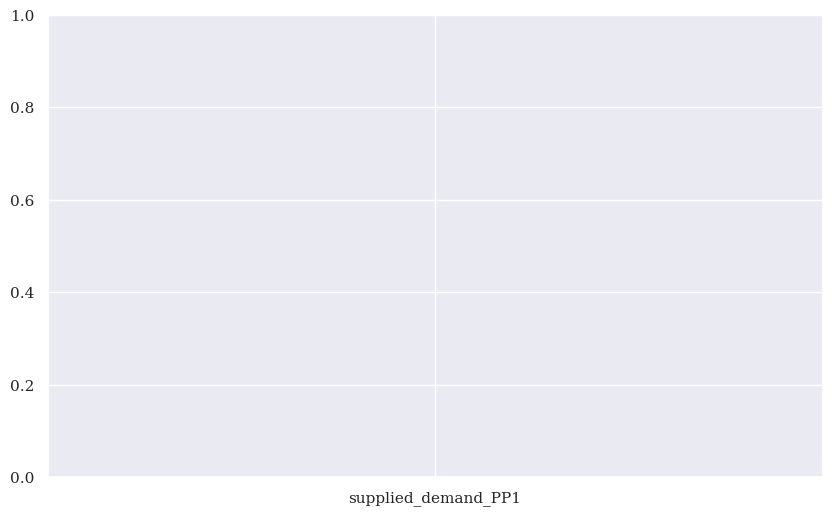

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font to serif
sns.set(font='serif')

# Transpose the DataFrame so that rows become the axes and columns become the lines
viz_data_transposed = results_plot.T.reset_index(drop=True)

# Create the parallel axis plot with customized parameters
plt.figure(figsize=(10, 6))

# Get the x-axis data (column names)
x_data = results_plot.columns

# Iterate through each row (line) in the transposed dataframe
for index, row in viz_data_transposed.iterrows():
    # Plot the line
    plt.plot(x_data, row, label=index)
    
# Set plot title and labels
plt.title('Parallel Axis Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


